In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import sklearn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.tail(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
27518,Female,71.0,1,0,No Info,23.46,3.5,100,0
27519,Female,51.0,0,0,No Info,54.89,4.8,130,0
27520,Female,68.0,0,0,No Info,27.32,4.8,140,0
27521,Female,52.0,0,0,never,28.87,5.8,155,0
27522,Female,68.0,0,0,former,21.54,4.5,80,0
27523,Female,28.0,0,0,No Info,40.10,6.0,90,0
27524,Male,31.0,0,0,current,19.81,6.2,155,0
27525,Male,14.0,0,0,never,27.32,6.5,130,0
27526,Male,53.0,0,0,never,29.40,6.6,155,0
27527,Female,39.0,0,0,No Info,41.35,4.5,159,0


In [ ]:
# Split the data into features (X) and labels (y)
X = data.drop('diabetes', axis=1)
Y = data['diabetes']

In [ ]:
print(X)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
27523  Female  28.0             0              0         No Info  40.10   
27524    Male  31.0             0              0         current  19.81   
27525    Male  14.0             0              0           never  27.32   
27526    Male  53.0             0              0           never  29.40   
27527  Female  39.0             0              0         No Info  41.35   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1              

In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
27523    0
27524    0
27525    0
27526    0
27527    0
Name: diabetes, Length: 27528, dtype: int64


In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [ ]:
# Create a LabelEncoder object
le = LabelEncoder()

# Convert the string values in the 'gender' and 'smoking_history' column to integers
X['gender'] = le.fit_transform(X['gender'])
X['smoking_history'] = le.fit_transform(X['smoking_history'])

# Standardize the data
X_scaled = scaler.fit_transform(X)

In [ ]:
mean_values = scaler.mean_
scale_values = scaler.scale_

print("Mean Values:", mean_values)
print("Scale Values:", scale_values)

Mean Values: [4.12489102e-01 4.20056176e+01 7.71941296e-02 3.87968614e-02
 2.19925167e+00 2.73698445e+01 5.52441514e+00 1.38018817e+02]
Scale Values: [ 0.4926511  22.4976091   0.26689922  0.1931105   1.88568331  6.68206636
  1.07879452 40.99275629]


In [ ]:
print(X_scaled)

[[-0.83728444  1.68881868 -0.28922575 ... -0.32622312  0.99702477
   0.04833007]
 [-0.83728444  0.53314032 -0.28922575 ... -0.00745945  0.99702477
  -1.41534316]
 [ 1.19254965 -0.62253804 -0.28922575 ... -0.00745945  0.16276024
   0.48743204]
 ...
 [ 1.19254965 -1.24482639 -0.28922575 ... -0.00745945  0.90432872
  -0.19561547]
 [ 1.19254965  0.48869115 -0.28922575 ...  0.30382151  0.99702477
   0.41424838]
 [-0.83728444 -0.1335972  -0.28922575 ...  2.09219046 -0.94959246
   0.51182659]]


In [ ]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
27523    0
27524    0
27525    0
27526    0
27527    0
Name: diabetes, Length: 27528, dtype: int64


# 0---> Non-diabetic

# 1---> diabetic


In [ ]:
import tensorflow as tf

# Define your neural network model with a name
model = tf.keras.Sequential(name="my_neural_network_model")
model.add(tf.keras.layers.Dense(units=16, input_shape=(X_scaled.shape[1],), activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
model.fit(X_scaled, Y, epochs=10, batch_size=10, validation_split=0.2)

# Save the model to a file
model.save('my_neural_network_model.h5')


Epoch 1/10
2203/2203 [==============================] - 17s 7ms/step - loss: 0.1512 - accuracy: 0.9471 - val_loss: 0.1032 - val_accuracy: 0.9660
Epoch 2/10
2203/2203 [==============================] - 5s 2ms/step - loss: 0.1138 - accuracy: 0.9599 - val_loss: 0.0978 - val_accuracy: 0.9659
Epoch 3/10
2203/2203 [==============================] - 4s 2ms/step - loss: 0.1061 - accuracy: 0.9628 - val_loss: 0.0890 - val_accuracy: 0.9733
Epoch 4/10
2203/2203 [==============================] - 6s 3ms/step - loss: 0.1009 - accuracy: 0.9649 - val_loss: 0.0879 - val_accuracy: 0.9711
Epoch 5/10
2203/2203 [==============================] - 5s 2ms/step - loss: 0.0976 - accuracy: 0.9652 - val_loss: 0.0851 - val_accuracy: 0.9726
Epoch 6/10
2203/2203 [==============================] - 9s 4ms/step - loss: 0.0947 - accuracy: 0.9671 - val_loss: 0.0844 - val_accuracy: 0.9740
Epoch 7/10
2203/2203 [==============================] - 4s 2ms/step - loss: 0.0922 - accuracy: 0.9680 - val_loss: 0.0830 - val_accuracy

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Make predictions on the test set
predictions = model.predict(X_scaled, batch_size=15, verbose=2)




1836/1836 - 3s - 3s/epoch - 2ms/step


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_scaled, Y, verbose=2)

# Print the evaluation metrics
print("Test accuracy:", accuracy)
print("Test loss:", loss)

861/861 - 1s - loss: 0.0833 - accuracy: 0.9709 - 943ms/epoch - 1ms/step
Test accuracy: 0.9709023833274841
Test loss: 0.0832635685801506


Epoch 1/10
1469/1469 [==============================] - 3s 2ms/step - loss: 0.0853 - accuracy: 0.9697 - val_loss: 0.0782 - val_accuracy: 0.9764
Epoch 2/10
1469/1469 [==============================] - 3s 2ms/step - loss: 0.0841 - accuracy: 0.9699 - val_loss: 0.0815 - val_accuracy: 0.9753
Epoch 3/10
1469/1469 [==============================] - 3s 2ms/step - loss: 0.0836 - accuracy: 0.9705 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 4/10
1469/1469 [==============================] - 3s 2ms/step - loss: 0.0833 - accuracy: 0.9706 - val_loss: 0.0802 - val_accuracy: 0.9748
Epoch 5/10
1469/1469 [==============================] - 3s 2ms/step - loss: 0.0827 - accuracy: 0.9706 - val_loss: 0.0766 - val_accuracy: 0.9762
Epoch 6/10
1469/1469 [==============================] - 4s 3ms/step - loss: 0.0822 - accuracy: 0.9713 - val_loss: 0.0830 - val_accuracy: 0.9724
Epoch 7/10
1469/1469 [==============================] - 3s 2ms/step - loss: 0.0819 - accuracy: 0.9704 - val_loss: 0.0779 - val_accuracy:

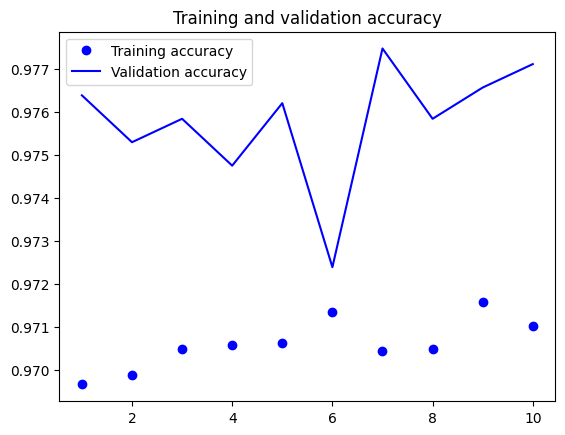

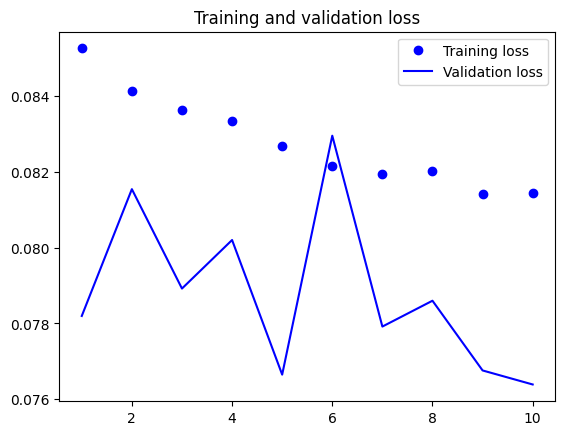

In [ ]:
# Fit the model to the training data
history = model.fit(X_scaled, Y, epochs=10, batch_size=15, validation_split=0.2)

# Plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_scaled)

861/861 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix

# Calculate F1 score
f1 = f1_score(Y, Y, average='binary')
print("F1 score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y, Y)
print("Confusion matrix:\n", conf_matrix)

F1 score: 1.0
Confusion matrix:
 [[25168     0]
 [    0  2360]]


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import load_model
from sklearn.model_selection import train_test_split

# Load the saved model
model_path = 'my_neural_network_model.h5'
model = load_model(model_path)

# Load the scaler used during training
scaler_mean = np.array([4.12489102e-01, 4.20056176e+01, 7.71941296e-02, 3.87968614e-02,
                         2.19925167e+00, 2.73698445e+01, 5.52441514e+00, 1.38018817e+02])
scaler_std = np.array([0.4926511, 22.4976091, 0.26689922, 0.1931105, 1.88568331, 6.68206636,
                          1.07879452, 40.99275629])

# Function to preprocess user input
def preprocess_input(input_query):
    gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level = input_query

    # Handle unexpected input values
    gender = gender if gender in ['Female', 'Male'] else 'Female'
    smoking_history = smoking_history if smoking_history in ['never', 'former', 'No info', 'current'] else 'never'

    # Convert string values to integers using LabelEncoder
    gender_encoded = 0 if gender == 'Female' else 1
    smoking_history_encoded = {'never': 0, 'former': 1, 'No info': 2, 'current': 3}[smoking_history]

    # Convert input_query to array and standardize
    input_array = np.array([gender_encoded, age, hypertension, heart_disease, smoking_history_encoded, bmi, HbA1c_level, blood_glucose_level])
    input_scaled = (input_array - scaler_mean) / scaler_std

    return input_scaled

# Function to make prediction
def make_prediction(input_queries, threshold):
    preprocessed_inputs = np.array([preprocess_input(query) for query in input_queries])
    predictions = model.predict(preprocessed_inputs)
    labels = np.where(predictions > threshold, "Non-diabetic", "Diabetic")
    return labels

# Function to find optimal threshold using validation set
def find_optimal_threshold(X_val, Y_val):
    thresholds = np.linspace(0, 1, 100)  # Generate a range of threshold values
    best_accuracy = 0
    optimal_threshold = 0

    for threshold in thresholds:
        correct_predictions = 0
        total_predictions = len(X_val)

        # Make predictions for the entire validation set
        predictions = make_prediction(X_val, threshold)

        # Count correct predictions
        for pred, true_label in zip(predictions, Y_val):
            if ((pred == "Non-diabetic").all() and true_label == 0) or ((pred == "Diabetic").all() and true_label == 1):
                correct_predictions += 1

        # Calculate accuracy
        accuracy = correct_predictions / total_predictions

        # Update optimal threshold if accuracy improves
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_threshold = threshold

    return optimal_threshold

# Assuming X_scaled and Y are your features and labels
# Load your dataset (Replace the following lines with your actual data loading code)
X_scaled = np.random.rand(27528, 8)  # Replace this with your actual scaled dataset
Y = np.random.randint(0, 2, 27528)  # Replace this with your actual labels

# Find optimal threshold using validation set
optimal_threshold = find_optimal_threshold(X_scaled[0:1000], Y[0:1000])

# Example usage
input_query = ('Female', 20.0, 0, 0, 'never', 27.32, 6.6, 200)
predictions = make_prediction(np.array([input_query]), optimal_threshold)
print("Predictions with dynamic threshold:", predictions)


32/32 [==============================] - 0s 1ms/step


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U21'), dtype('float64')) -> None

In [ ]:
  import time

start_time = time.time()
prediction = make_prediction(input_query, optimal_threshold)
end_time = time.time()

print("Prediction time:", end_time - start_time)